In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 5.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search facebook/opt-350m, learning rate 5e-05, focal loss gamma 2


Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.7382	Val Loss:	0.6255	Accuracy:	0.7505	F1:	0.4888
2 / 30: Train Loss:	0.4024	Val Loss:	0.5620	Accuracy:	0.7965	F1:	0.6742
3 / 30: Train Loss:	0.3523	Val Loss:	0.5922	Accuracy:	0.7418	F1:	0.6899
4 / 30: Train Loss:	0.4185	Val Loss:	0.5852	Accuracy:	0.7396	F1:	0.4252
5 / 30: Train Loss:	0.4618	Val Loss:	0.6888	Accuracy:	0.7396	F1:	0.4252
6 / 30: Train Loss:	0.3907	Val Loss:	0.6584	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.50      0.64      0.56       119
      struct       0.86      0.78      0.82       338

    accuracy                           0.74       457
   macro avg       0.68      0.71      0.69       457
weighted avg       0.77      0.74      0.75       457

test results:
              precision    recall  f1-score   support

       bknow       0.44      0.57      0.49        67
      struct       0.83      0

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.4122	Val Loss:	0.7959	Accuracy:	0.2626	F1:	0.2099
2 / 30: Train Loss:	0.1232	Val Loss:	0.6821	Accuracy:	0.6849	F1:	0.5519
3 / 30: Train Loss:	0.1153	Val Loss:	0.6853	Accuracy:	0.6214	F1:	0.6047
4 / 30: Train Loss:	0.0943	Val Loss:	0.5866	Accuracy:	0.7330	F1:	0.6393
5 / 30: Train Loss:	0.0952	Val Loss:	0.5910	Accuracy:	0.7462	F1:	0.7037
6 / 30: Train Loss:	0.0812	Val Loss:	0.5207	Accuracy:	0.7899	F1:	0.7109
7 / 30: Train Loss:	0.1832	Val Loss:	0.6839	Accuracy:	0.7396	F1:	0.4252
8 / 30: Train Loss:	0.1174	Val Loss:	0.6958	Accuracy:	0.2604	F1:	0.2066
9 / 30: Train Loss:	0.1035	Val Loss:	0.7341	Accuracy:	0.2604	F1:	0.2066
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.62      0.51      0.56       119
      struct       0.84      0.89      0.86       338

    accuracy                           0.79       457
   macro avg       0.73      0.70      0.71   

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.2128	Val Loss:	0.6421	Accuracy:	0.7396	F1:	0.4252
2 / 30: Train Loss:	0.0135	Val Loss:	0.6582	Accuracy:	0.7396	F1:	0.4252
3 / 30: Train Loss:	0.0132	Val Loss:	0.6437	Accuracy:	0.7396	F1:	0.4252
4 / 30: Train Loss:	0.0114	Val Loss:	0.6650	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1.00      0.85       189

    accuracy                           0.74       256
   macro avg       0.37      0.50      0.42       256
weighted av

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.9737	Val Loss:	0.6519	Accuracy:	0.7396	F1:	0.4252
2 / 30: Train Loss:	0.0003	Val Loss:	0.7205	Accuracy:	0.2604	F1:	0.2066
3 / 30: Train Loss:	0.0003	Val Loss:	0.7231	Accuracy:	0.2604	F1:	0.2066
4 / 30: Train Loss:	0.0002	Val Loss:	0.7206	Accuracy:	0.2604	F1:	0.2066
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1.00      0.85       189

    accuracy                           0.74       256
   macro avg       0.37      0.50      0.42       256
weighted av

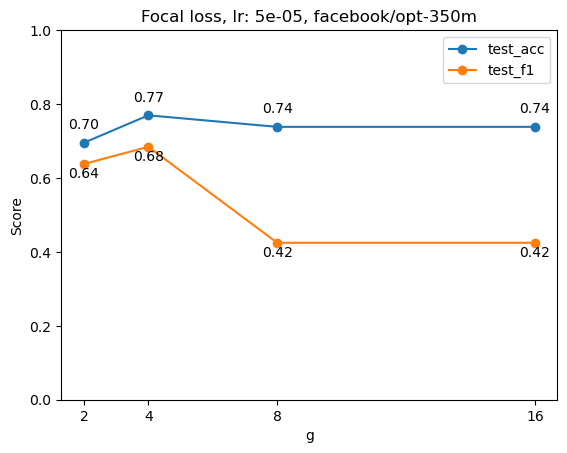

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f